### Add Fold labels

In [72]:
import pandas as pd 
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

essay_df = pd.read_csv(r"D:\Learning\NLP\Projects\EssayInsightAI\analyzer\data\train_essays_annotated.csv")
label_df = pd.read_csv(r"D:\Learning\NLP\Projects\EssayInsightAI\analyzer\data\train_labels.csv")
# label_df["count"] = label_df["predictionstring"].apply(lambda x: len(list(x.split())))
label_df.head(2)

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring,fold_label
0,423A1CA112E2,1.622630e+12,8,229,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,8
1,423A1CA112E2,1.622630e+12,230,312,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59,8


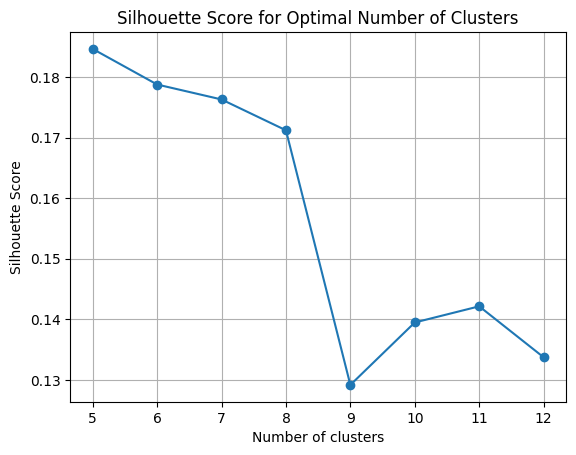

Optimal Number of Clusters: 7


In [63]:
scaler = StandardScaler()
scaled_data = count_arr #scaler.fit_transform(count_arr)

# Finding the optimal number of clusters using silhouette score
silhouette_scores = []
cluster_ls = np.arange(5, 13, 1)

# Try different numbers of clusters (from 2 to 10)
for n_clusters in cluster_ls:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(cluster_ls, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.grid(True)
plt.show()

# Optimal number of clusters
optimal_clusters = cluster_ls[np.argmax(silhouette_scores)] + 2

print("Optimal Number of Clusters:", optimal_clusters)

# Perform KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(scaled_data)

In [66]:
kmeans = KMeans(n_clusters=9, random_state=42)
labels = kmeans.fit_predict(scaled_data)

fold_labels = []

for i, id_ in enumerate(tqdm(label_df["id"].unique())):
    for j, row in label_df[label_df["id"] == id_].iterrows():
        fold_labels.append(labels[i])

label_df["fold_label"] = fold_labels
label_df.drop(["count"], axis=0, inplace=True)
label_df.head(2)

100%|██████████| 15594/15594 [03:29<00:00, 74.47it/s] 


,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring,fold_label
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,8
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59,8


In [67]:
label_df.to_csv(r"D:\Learning\NLP\Projects\EssayInsightAI\analyzer\data\train_labels.csv")

In [71]:
label_dict = {k:v for k, v in zip(label_df["id"], label_df["fold_label"])}

essay_df["fold_label"] = essay_df["id"].apply(lambda x: label_dict[x])
essay_df.to_csv(r"D:\Learning\NLP\Projects\EssayInsightAI\analyzer\data\train_essays_annotated.csv", index=False)
essay_df.head()

,id,text,prediction,fold_label
0,0000D23A521A,"Some people belive that the so called ""face"" o...","['B-Position', 'I-Position', 'I-Position', 'I-...",4
1,00066EA9880D,Driverless cars are exaclty what you would exp...,"['B-Lead', 'I-Lead', 'I-Lead', 'I-Lead', 'I-Le...",1
2,000E6DE9E817,Dear: Principal\n\nI am arguing against the po...,"['O', 'O', 'B-Position', 'I-Position', 'I-Posi...",7
3,001552828BD0,Would you be able to give your car up? Having ...,"['B-Lead', 'I-Lead', 'I-Lead', 'I-Lead', 'I-Le...",0
4,0016926B079C,I think that students would benefit from learn...,"['B-Position', 'I-Position', 'I-Position', 'I-...",1


### Convert txt files to csv

In [2]:
import os
from tqdm import tqdm
import pandas as pd

mainpath = "./analyzer/data/train"
file_ls = os.listdir(mainpath)
txt_ls = [open(os.path.join(mainpath, fp), "r").read() for fp in tqdm(file_ls)]

df = pd.DataFrame.from_dict({
    "id": file_ls,
    "text": txt_ls
})
df.head()

  0%|          | 0/15594 [00:00<?, ?it/s]

100%|██████████| 15594/15594 [00:44<00:00, 354.01it/s]


,id,text
0,0000D23A521A.txt,"Some people belive that the so called ""face"" o..."
1,00066EA9880D.txt,Driverless cars are exaclty what you would exp...
2,000E6DE9E817.txt,Dear: Principal\n\nI am arguing against the po...
3,001552828BD0.txt,Would you be able to give your car up? Having ...
4,0016926B079C.txt,I think that students would benefit from learn...


In [4]:
df.to_csv("./analyzer/data/train.csv", index=False)

In [7]:
import pandas as pd

df = pd.read_csv("./analyzer/data/train_essay.csv")
df["id"] = df["id"].apply(lambda x: x.replace(".txt", ""))
df.to_csv("./analyzer/data/train_essay.csv", index=False)
df.head()

,id,text
0,0000D23A521A,"Some people belive that the so called ""face"" o..."
1,00066EA9880D,Driverless cars are exaclty what you would exp...
2,000E6DE9E817,Dear: Principal\n\nI am arguing against the po...
3,001552828BD0,Would you be able to give your car up? Having ...
4,0016926B079C,I think that students would benefit from learn...


In [11]:
from sklearn.model_selection import KFold
import numpy as np

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
# kf.get_n_splits(X)

In [12]:
list(kf.split(X))

[(array([2, 3]), array([0, 1])), (array([0, 1]), array([2, 3]))]

### Random

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, AutoConfig
# tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased', force_download=True)
config = AutoConfig.from_pretrained("google-bert/bert-base-cased", force_download=True)
model = AutoModelForTokenClassification.from_pretrained("google-bert/bert-base-cased", force_download=True)

### Preprocessing

In [21]:
import pandas as pd 
from tqdm import tqdm

essay_df = pd.read_csv(r"D:\Learning\NLP\Projects\EssayInsightAI\analyzer\data\train_essay.csv").iloc[12126:]
label_df = pd.read_csv(r"D:\Learning\NLP\Projects\EssayInsightAI\analyzer\data\train_labels.csv")

predictions = []
for _, row in tqdm(essay_df.iterrows()):
    seq_len = len(row["text"].split())
    preds = ["O"]*seq_len
    for _, det_row in label_df[label_df["id"] == row["id"]].iterrows():
        string = [int(k) for k in det_row["predictionstring"].split()]
        discourse_type = det_row["discourse_type"]

        preds[string[0]] = f"B-{discourse_type}"
        for id_ in string[1:]: preds[id_] = f"I-{discourse_type}"
    predictions.append(preds)

essay_df["prediction"] = predictions

3468it [00:58, 58.99it/s]


In [19]:
row["id"]

'C647D6659C92'

In [12]:
"A34FF5F00E3A", "C647D6659C92"

'I disagree with the principal because some kids may like to go home ,or do not want to do anything after school, they could be busy ,or do not have the right actions or just are not as good at any of the sports. Some kids at the school may not think of the sports as something to do or dont like there school team and could think its not for them to play on a school team or they just cant do it at all . Although,\n\nkids might not wanna do sports at all and think itÃƒÂ…Ã¢Â€Âº a bad team or it just not the type of things they prefer to do . Most children like staying home and playing games or doing other fun things or just eat a lot of food and be lazy but possibly , kids are having a busy life and have to do things and do not have time for the sports like help grandparents or siblings or just watch over the house while no ones there. It may be a bit hard for them to get into any sports if students cant control their actions as in helping or showing there doing something or communication

In [27]:
import os
import glob

datapath = r"D:\Learning\NLP\Projects\EssayInsightAI\analyzer\data"

test_paths = os.listdir(os.path.join(datapath, "test"))
test_texts = [open(os.path.join(datapath, "test", f), "r").read() for f in test_paths]

### Inference

In [10]:
import os
import sys
import json 
import torch

sys.path.append("./")
sys.path.append("./analyzer")
# from analyzer.train import load_saved_model
# from analyzer.utils import load_config, prepare_test_data
from analyzer.metrics import competition_metric

d:\Learning\NLP\envs\essay_ai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
pred_df = pd.read_csv(r"D:\Learning\NLP\Projects\EssayInsightAI\analyzer\output\distilbert\submission.csv")
true_df = pd.read_csv(r"D:\Learning\NLP\Projects\EssayInsightAI\analyzer\output\distilbert\submission.csv")
true_df["discourse_type"] = true_df["class"]

true_df.drop('class', axis=1, inplace=True)

competition_metric(pred_df, true_df)

1.0

In [18]:
from transformers import AutoTokenizer, AutoModel, AutoConfig
import os

path = r"D:\Learning\NLP\Projects\EssayInsightAI\analyzer\models\distilbert-base-uncased"
config_model = AutoConfig.from_pretrained(
    os.path.join(path, "config.json")
)
# config_model.num_labels = num_classes
# config_model.id2label = id2label
# config_model.label2id = label2id
model = AutoModel.from_pretrained(
    path,
    config=config_model,
)

In [19]:
config_model

DistilBertConfig {
  "_name_or_path": "D:\\Learning\\NLP\\Projects\\EssayInsightAI\\analyzer\\models\\distilbert-base-uncased\\config.json",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.48.2",
  "vocab_size": 30522
}

In [2]:
datapath = r"D:\Learning\NLP\Projects\EssayInsightAI\analyzer\data"
ckpt_path = r"D:\Learning\NLP\Projects\EssayInsightAI\analyzer\output\distilbert\lightning_logs\version_0\checkpoints\epoch=0-step=5.ckpt"
config_path = r"D:\Learning\NLP\Projects\EssayInsightAI\analyzer\configs\config.yaml"

config = load_config(config_path)
with open(os.path.join(datapath, "label2id.json"), "r") as f:
    label2id = json.load(f)
num_classes = len(label2id)
id2label = {v:k for k, v in label2id.items()}
data, network, trainer = load_saved_model(
    config, 
    ckpt_path, 
    [label2id, id2label, num_classes]
    )

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at D:\Learning\NLP\Projects\EssayInsightAI\analyzer\models\distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [3]:
test_df = prepare_test_data(datapath)
test_loader = data.test_dataloader(test_df)

logits = trainer.predict(network, dataloaders=test_loader)

d:\Learning\NLP\envs\essay_ai\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:420: Consider setting `persistent_workers=True` in 'predict_dataloader' to speed up the dataloader worker initialization.


Predicting DataLoader 0: 100%|██████████| 3/3 [00:03<00:00,  0.95it/s]


In [ ]:
word_ids = []
for batch in test_loader:
    word_ids.extend(batch["word_ids"].numpy())
len(word_ids)

In [9]:
import pandas as pd


def get_out(x, y):
    return x+1, y+2

df = pd.DataFrame.from_dict({
    "X": [1, 2, 3],
    "Y": [7, 8, 9],
    "Z": [-3, -6, -9]
})

df[["A", "B"]] = df.apply(lambda row : get_out(row.X, row.Y), axis=1, result_type='expand')
df.head()

,X,Y,Z,A,B
0,1,7,-3,2,9
1,2,8,-6,3,10
2,3,9,-9,4,11
